### About

In this very simple example, we would like to calculate the Higgs recoil mass on Higgsstrahlung events (e+e- ---> ZH) with Z->mumu.

### Data
Please download these files from [here](https://sas.desy.de/index.php/s/eBYsECq4sN6NGkP):
  * Signal: `E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root`
  * Background: `E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root`
  
Create a folder called `data` in the root directory of this repository. Then put into separate foldes `signal`and `bgk`

### Imports

In [1]:
1+1

2

In [2]:
import ROOT
from ROOT import edm4hep
import numpy as np
import os
from os import listdir
import math

# from edm4hep_path import get_edm4hep_path
from podio.root_io import Reader

ROOT.gInterpreter.LoadFile('/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'
+"/include/edm4hep/utils/kinematics.h")
USE_ENERGY=edm4hep.utils.detail.UseEnergyTag()

Welcome to JupyROOT 6.28/10


In [3]:
get_edm4hep_path = '/cvmfs/sw.hsf.org/key4hep/releases/2024-03-10/x86_64-ubuntu22.04-gcc11.4.0-opt/edm4hep/0.10.5-4hlcr2'


In [4]:
# filename = "/home/cinyu/ddfastshowerml2/scripts/CLD_dummyOutput_ML_Rot2_edm4hep.root"
filename_full = "/home/cinyu/ddfastshowerml2/scripts/CLD_geant4_edm4hep.root"
filename_fast = "/home/cinyu/ddfastshowerml2/scripts/CLD_fast_notracker_edm4hep.root"

In [5]:
reader = Reader(filename_fast)

MCmorethanone = 0
for i, event in enumerate(reader.get('events')):            
    # print(event) 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    
    if len(pIDs) != 1:
        print(pIDs)
        MCmorethanone += 1
        continue


print("#events with more than one MC particles:",MCmorethanone, "out of", len(reader.get('events')))


#events with more than one MC particles: 0 out of 100


### histograms

In [6]:
reader = Reader(filename_fast)

hist_energy = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy.Fill(np.log10(energy)+3) # emergy in MeV for comparisonbreak



In [7]:
reader = Reader(filename_full)

hist_energy2 = ROOT.TH1F("energy","cell energy hist",100,-2,2)

for i, event in enumerate(reader.get('events')):  
    if i == 50: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        # print(pIDs)
        continue
    hit = event.get("ECalBarrelCollection")
    energies = np.array(hit.energy())
    for energy in energies:
        hist_energy2.Fill(np.log10(energy)+3) # emergy in MeV for comparison



Warning in <TROOT::Append>: Replacing existing TH1: energy (Potential memory leak).


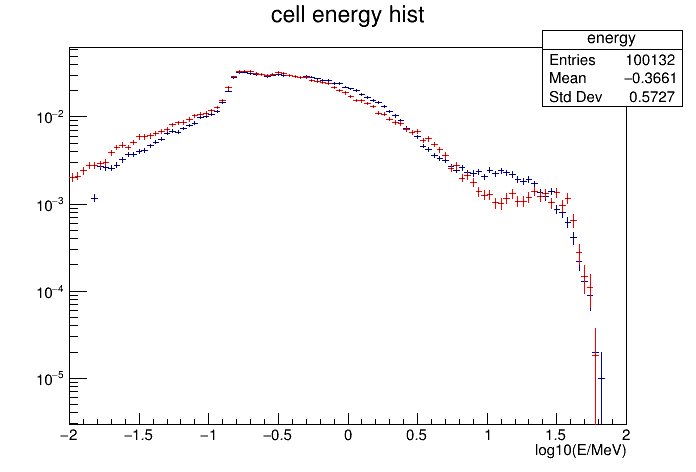

In [8]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_energy.GetXaxis().SetTitle("log10(E/MeV)")
hist_energy.Scale(1/hist_energy.Integral())
hist_energy2.Scale(1/hist_energy2.Integral())
hist_energy2.SetLineColor(2)
hist_energy.Draw()
hist_energy2.Draw('SAME')
c1.SetLogy()
c1.Draw()


### hit position

In [57]:
reader = Reader(filename_fast)

hist_x = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x.Fill(hit.position().z)

    



Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


In [58]:
reader = Reader(filename_full)

hist_x2 = ROOT.TH1F("x","hit x",30,-240,240)

for i, event in enumerate(reader.get('events')): 
    if i == 100: break
    mcParticles = event.get("MCParticles")
    pIDs = np.array(mcParticles.PDG())
    if len(pIDs) != 1:
        continue
    hits = event.get("ECalBarrelCollection")
    for hit in hits:
        hist_x2.Fill(hit.position().z)

    

Warning in <TROOT::Append>: Replacing existing TH1: x (Potential memory leak).


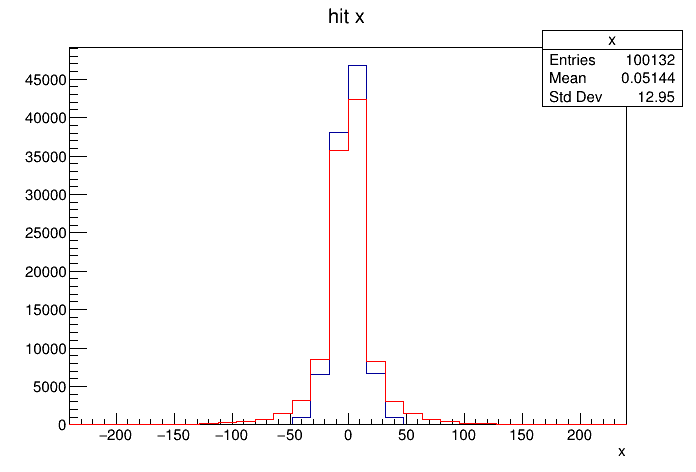

In [59]:
### Draw via ROOT
c1 = ROOT.TCanvas()
hist_x.GetXaxis().SetTitle("x")
hist_x2.SetLineColor(2)
hist_x.Draw()
hist_x2.Draw('SAME')
# c1.SetLogy()
c1.Draw()


### Event Loop

In [ ]:
def doEvtLoop(inputfiles,nbin,xmin,xmax,histtag,title):
    
    reader = Reader(inputfiles)
    hist = ROOT.TH1F(histtag,title,nbin,xmin,xmax)

    pxinitial = 0.
    Einitial = 250. # considering resonance here
    angle = 0.007 # crossing angle parameter, change as needed

    pxinitial = Einitial*angle
    Einitial = 2.*np.sqrt((Einitial/2.)**2 + (pxinitial/2.)**2)
        
    ecms = edm4hep.LorentzVectorE(pxinitial,0.,0.,Einitial)


    for i, event in enumerate(reader.get('events')):            
        
        ## HANDS-ON!!
        # We need to get the muon collection. 
        # Then we should put a cut: Take events with exactly TWO muons
        # Use edmp4hep utils p4: This will put mu1 and mu2 into 4-vector
 
        
        # recoil mass calculations
        recoil = ecms - (mu1 + mu2)
        hist.Fill(recoil.M())
        
    return hist



### Running over samples

In [ ]:
signalDir = '../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root'
bkgDir = '../data/bgk/E250-TDR_ws.P4f_zz_sl.Gwhizard-1_95.eL.pR.I106575.001.edm4hep.root'

sig_hist = doEvtLoop(signalDir,40,50.,250.,"signal","; mass [GeV]; ; ")
bkg_hist = doEvtLoop(bkgDir,40,50.,250.,"bkg", "; mass [GeV]; ; ")

runtime_error: void podio::ROOTReader::openFiles(const vector<string>& filenames) =>
    runtime_error: File ../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root couldn't be found

Error in <TFile::TFile>: file /home/cinyu/tutorials/edm4hep_analysis/../data/signal/E250-TDR_ws.Pe2e2h.Gwhizard-1_95.eL.pR.I106479.001.edm4hep.root does not exist


### Draw via ROOT

In [ ]:
c1 = ROOT.TCanvas()
sig_hist.Draw()
hs = ROOT.THStack("hs","; mass [GeV]; ; ")
leg = ROOT.TLegend(0.5,0.6,0.9,0.9)
leg.SetHeader("ILC at 250 GeV")
sig_hist.SetFillColor(2)
leg.AddEntry(sig_hist, "Signal", "F")
bkg_hist.SetFillColor(4)
leg.AddEntry(bkg_hist, "Bkg.","F")
hs.Add(bkg_hist)
hs.Add(sig_hist)
hs.Draw()
leg.Draw()
c1.Draw()


NameError: name 'sig_hist' is not defined